In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

In [7]:
teams_df = pd.read_csv('data/2025/mens_summer_u20_cn_teams.csv')
teams_df

,Club ID,Club
0,183436,BURLINGTON SC U20 MEN EAST
1,183416,OAKVILLE SC U20 MEN
2,175395,NORTH MISSISSAUGA SC U20 MEN
3,175357,SIGMA FC U20 MEN
4,175353,SCROSOPPI FC U20 MEN
5,175341,NORTH TORONTO U20 MEN
6,175737,RUSH CANADA ACADEMY U20 MEN
7,176210,WOODBRIDGE STRIKERS U20 MEN WEST
8,175425,RICHMOND HILL SC U20 MEN
9,175298,VAUGHAN AZZURRI U20 MEN


In [8]:
scores_df = pd.read_csv('data/2025/2025-06-29_mens_summer_u20_cn_results.csv')
scores_df


,Match ID,Home result,Away result,Home team,Away team
0,262611501,0,2,175425,183416
1,262611502,1,1,175353,175395
2,262611503,2,6,175357,176210
3,262611504,0,9,183436,175298
4,262611505,1,3,175737,175341
5,262611506,7,2,175298,183416
6,262611507,3,0,175395,175737
7,262611508,6,1,176210,175353
8,262611509,1,1,183436,175357
9,262611510,2,0,175341,175425


In [9]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [10]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           BURLINGTON SC U20 MEN EAST  OAKVILLE SC U20 MEN  NORTH MISSISSAUGA SC U20 MEN  SIGMA FC U20 MEN  SCROSOPPI FC U20 MEN  NORTH TORONTO U20 MEN  RUSH CANADA ACADEMY U20 MEN  WOODBRIDGE STRIKERS U20 MEN WEST  RICHMOND HILL SC U20 MEN  VAUGHAN AZZURRI U20 MEN
262611501                           0                    1                             0                 0                     0                      0                            0                                 0                        -1                        0
262611502                           0                    0                            -1                 0                     1                      0                            0                                 0                         0                        0
262611503                           0                    0                             0                -1                     0                      0                            0                      

In [11]:
print(X_df.T.to_string())

                                  262611501  262611502  262611503  262611504  262611505  262611506  262611507  262611508  262611509  262611510  262611511  262611512  262611513  262611514  262611515  262611516  262611517  262611518  262611519  262611520  262611521  262611522  262611523  262611524  262611525  262611526  262611527  262611528  262611529  262611530  262611531  262611532  262611533  262611534  262611535  262611536  262611537  262611538  262611539  262611540  262611541  262611542  262611543  262611545  262611546  262611547  262611548  262611549
BURLINGTON SC U20 MEN EAST                0          0          0         -1          0          0          0          0          1          0          0          0          0         -1          0          0          0          0         -1          0         -1          0          0          0          0          0          0          0         -1          0          0          0         -1          0          0          0          0

In [12]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                                  BURLINGTON SC U20 MEN EAST  OAKVILLE SC U20 MEN  NORTH MISSISSAUGA SC U20 MEN  SIGMA FC U20 MEN  SCROSOPPI FC U20 MEN  NORTH TORONTO U20 MEN  RUSH CANADA ACADEMY U20 MEN  WOODBRIDGE STRIKERS U20 MEN WEST  RICHMOND HILL SC U20 MEN  VAUGHAN AZZURRI U20 MEN
BURLINGTON SC U20 MEN EAST                                10                   -1                            -1                -1                    -1                     -1                           -1                                -1                        -1                       -2
OAKVILLE SC U20 MEN                                       -1                   10                            -1                -1                    -1                     -1                           -1                                -1                        -2                       -1
NORTH MISSISSAUGA SC U20 MEN                              -1                   -1                            10                -1    

In [13]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                                  BURLINGTON SC U20 MEN EAST  OAKVILLE SC U20 MEN  NORTH MISSISSAUGA SC U20 MEN  SIGMA FC U20 MEN  SCROSOPPI FC U20 MEN  NORTH TORONTO U20 MEN  RUSH CANADA ACADEMY U20 MEN  WOODBRIDGE STRIKERS U20 MEN WEST  RICHMOND HILL SC U20 MEN  VAUGHAN AZZURRI U20 MEN
BURLINGTON SC U20 MEN EAST                                10                   -1                            -1                -1                    -1                     -1                           -1                                -1                        -1                       -2
OAKVILLE SC U20 MEN                                       -1                   10                            -1                -1                    -1                     -1                           -1                                -1                        -2                       -1
NORTH MISSISSAUGA SC U20 MEN                              -1                   -1                            10                -1    

In [14]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                                  GD
BURLINGTON SC U20 MEN EAST       -24
OAKVILLE SC U20 MEN               10
NORTH MISSISSAUGA SC U20 MEN       1
SIGMA FC U20 MEN                  -7
SCROSOPPI FC U20 MEN             -19
NORTH TORONTO U20 MEN              7
RUSH CANADA ACADEMY U20 MEN       -6
WOODBRIDGE STRIKERS U20 MEN WEST  26
RICHMOND HILL SC U20 MEN         -19
VAUGHAN AZZURRI U20 MEN            0


In [15]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                                  GD with limited blowouts
BURLINGTON SC U20 MEN EAST                             -16
OAKVILLE SC U20 MEN                                      8
NORTH MISSISSAUGA SC U20 MEN                             4
SIGMA FC U20 MEN                                        -6
SCROSOPPI FC U20 MEN                                   -16
NORTH TORONTO U20 MEN                                    6
RUSH CANADA ACADEMY U20 MEN                             -4
WOODBRIDGE STRIKERS U20 MEN WEST                        18
RICHMOND HILL SC U20 MEN                               -15
VAUGHAN AZZURRI U20 MEN                                  0


In [16]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                                  massey_rating
VAUGHAN AZZURRI U20 MEN                2.641667
WOODBRIDGE STRIKERS U20 MEN WEST       2.629167
OAKVILLE SC U20 MEN                    0.758333
NORTH TORONTO U20 MEN                  0.670833
NORTH MISSISSAUGA SC U20 MEN          -0.066667
SIGMA FC U20 MEN                      -0.504167
RUSH CANADA ACADEMY U20 MEN           -0.795833
RICHMOND HILL SC U20 MEN              -1.658333
SCROSOPPI FC U20 MEN                  -1.733333
BURLINGTON SC U20 MEN EAST            -1.941667


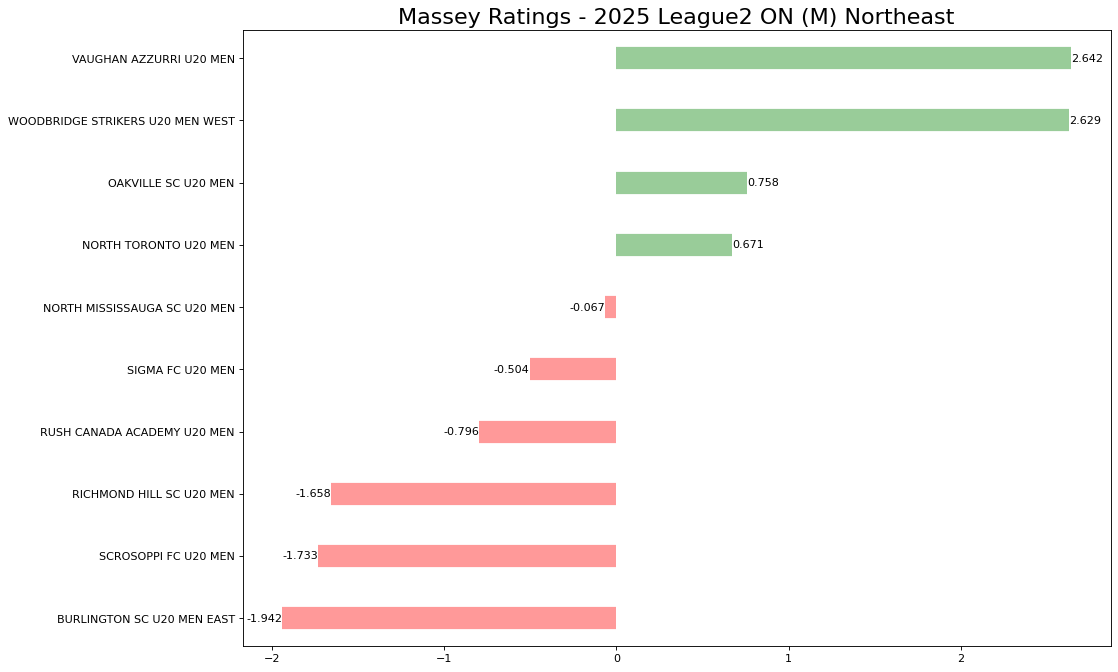

In [17]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (M) Northeast', fontdict={
          'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [18]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                                  massey_rating
WOODBRIDGE STRIKERS U20 MEN WEST       1.804167
VAUGHAN AZZURRI U20 MEN                1.791667
OAKVILLE SC U20 MEN                    0.608333
NORTH TORONTO U20 MEN                  0.595833
NORTH MISSISSAUGA SC U20 MEN           0.233333
SIGMA FC U20 MEN                      -0.479167
RUSH CANADA ACADEMY U20 MEN           -0.520833
BURLINGTON SC U20 MEN EAST            -1.291667
RICHMOND HILL SC U20 MEN              -1.308333
SCROSOPPI FC U20 MEN                  -1.433333


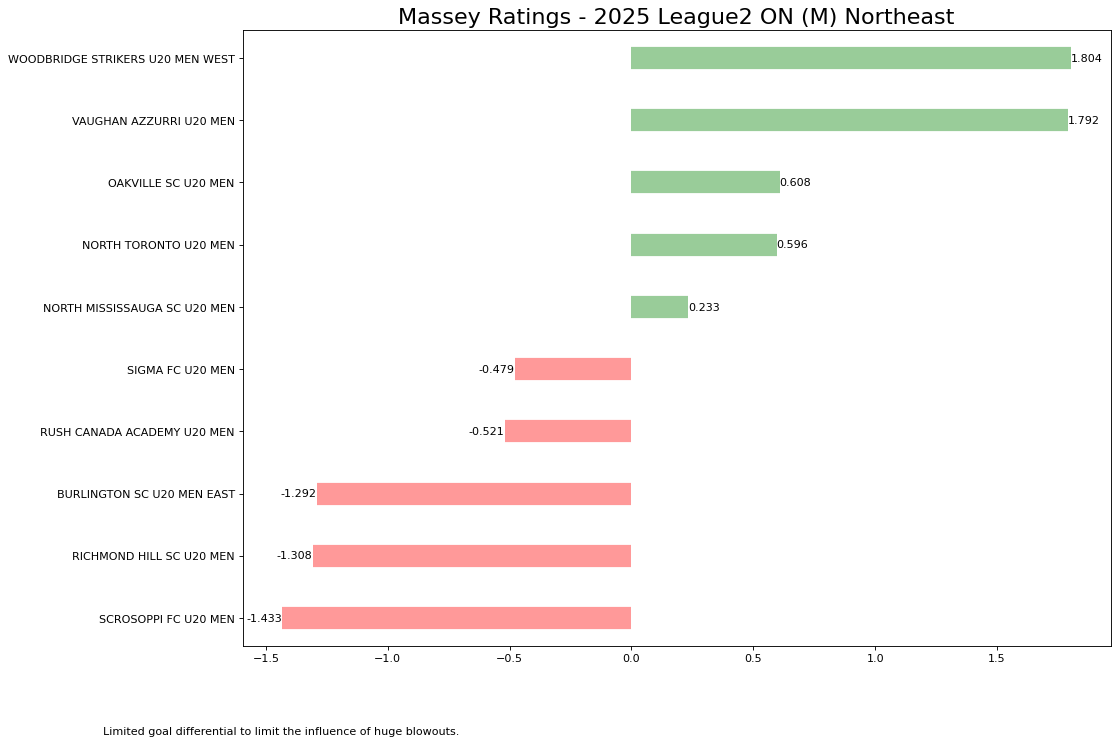

In [19]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (M) Northeast', fontdict={'size': 20})
plt.figtext(s='Limited goal differential to limit the influence of huge blowouts.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()